## load_linnerud

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = sklearn.datasets.load_linnerud()
print(data.keys())
for f in data.keys():
    t = type(data[f])
    print('key: {}, type: {}'.format(f, t))
    if t == np.ndarray:
        print('shape: {}'.format(data[f].shape))

dict_keys(['target_names', 'DESCR', 'feature_names', 'target', 'data_filename', 'data', 'target_filename'])
key: target_names, type: <class 'list'>
key: DESCR, type: <class 'str'>
key: feature_names, type: <class 'list'>
key: target, type: <class 'numpy.ndarray'>
shape: (20, 3)
key: data_filename, type: <class 'str'>
key: data, type: <class 'numpy.ndarray'>
shape: (20, 3)
key: target_filename, type: <class 'str'>


In [3]:
print(data.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *physiological* - CSV containing 20 observations on 3 exercise variables:
   Weight, Waist and Pulse.

- *exercise* - CSV containing 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [8]:
print(data.target_names)

['Weight', 'Waist', 'Pulse']


In [11]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df[data.target_names[0]] = data.target[:, 0]
df[data.target_names[1]] = data.target[:, 1]
df[data.target_names[2]] = data.target[:, 2]

In [12]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [13]:
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [14]:
print(df.shape)

(20, 6)


In [15]:
df.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Chins     20 non-null float64
Situps    20 non-null float64
Jumps     20 non-null float64
Weight    20 non-null float64
Waist     20 non-null float64
Pulse     20 non-null float64
dtypes: float64(6)
memory usage: 1.0 KB


In [17]:
df.isnull().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

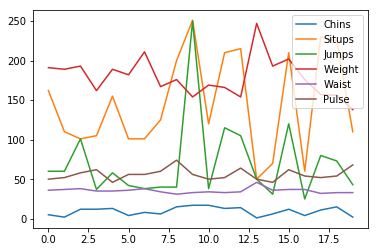

In [18]:
df.plot()

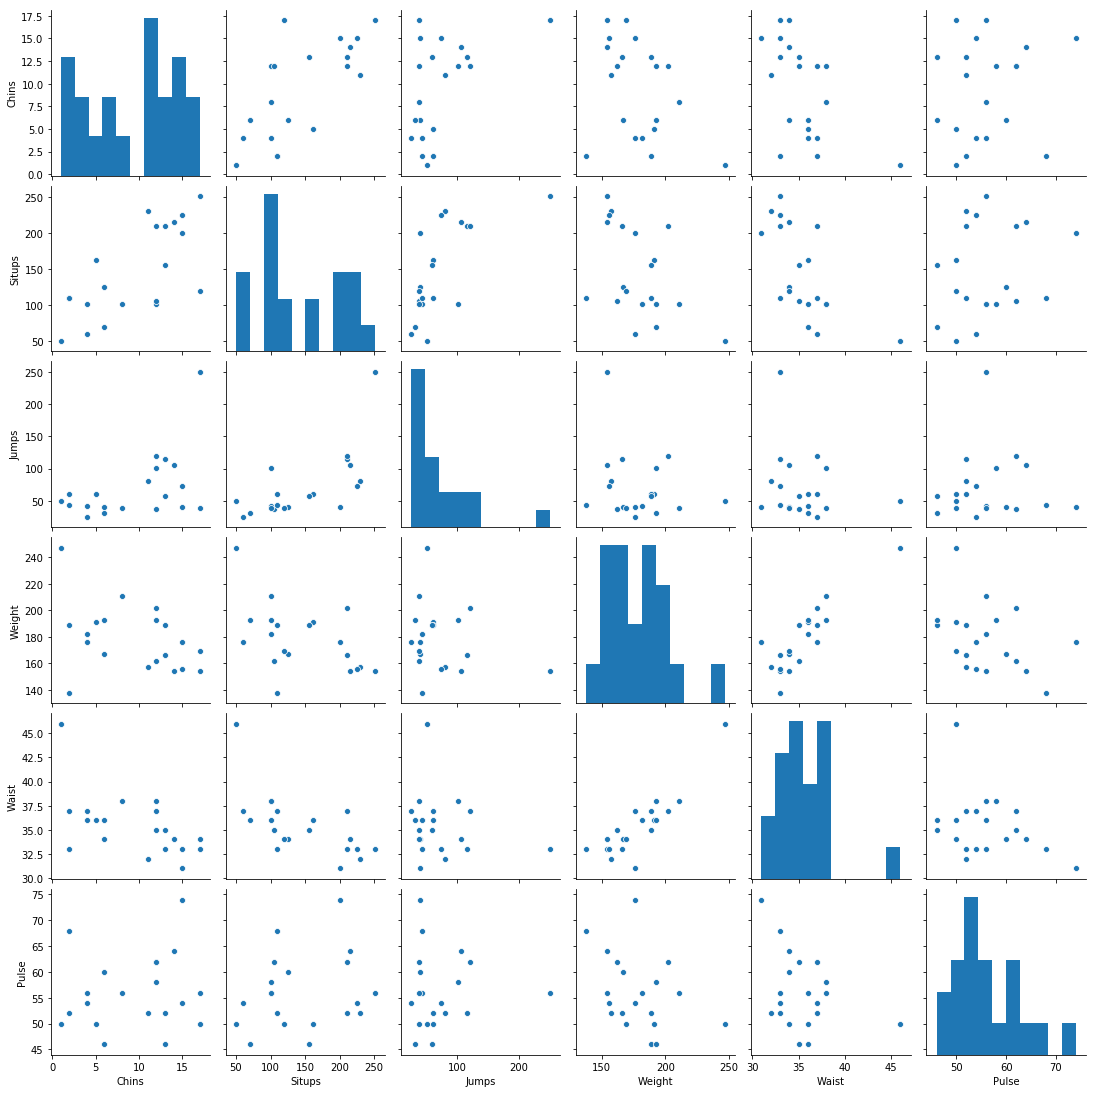

In [19]:
sns.pairplot(df)

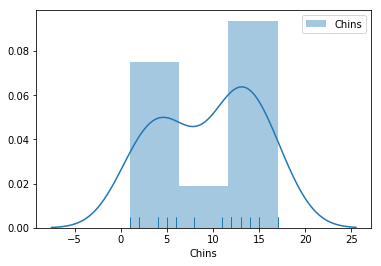

In [20]:
sns.distplot(df['Chins'], hist=True, rug=True, label="Chins")
plt.legend()
plt.show()

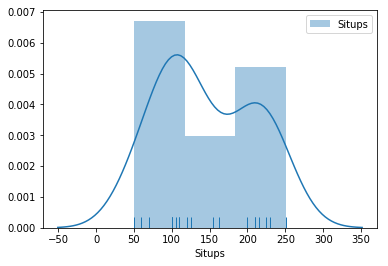

In [21]:
sns.distplot(df['Situps'], hist=True, rug=True, label="Situps")
plt.legend()
plt.show()

[]

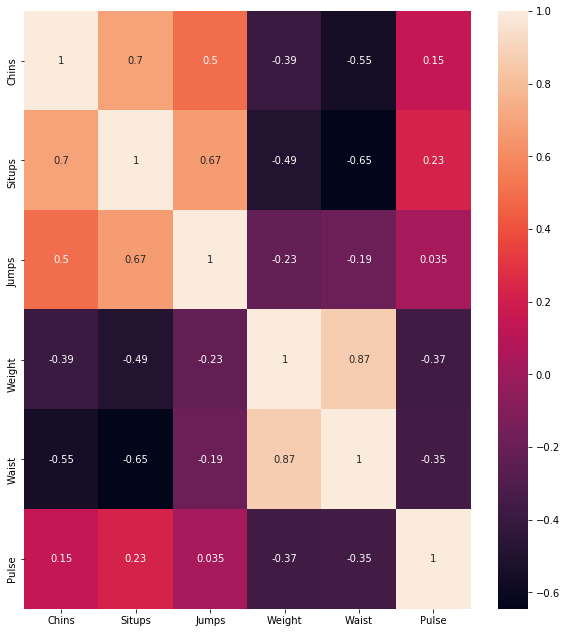

In [22]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

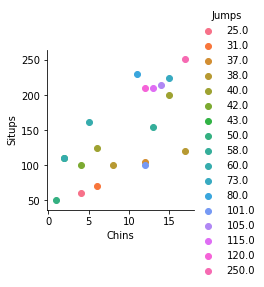

In [23]:
sns.FacetGrid(df, hue='Jumps') \
.map(plt.scatter, 'Chins', 'Situps') \
.add_legend()
plt.show()

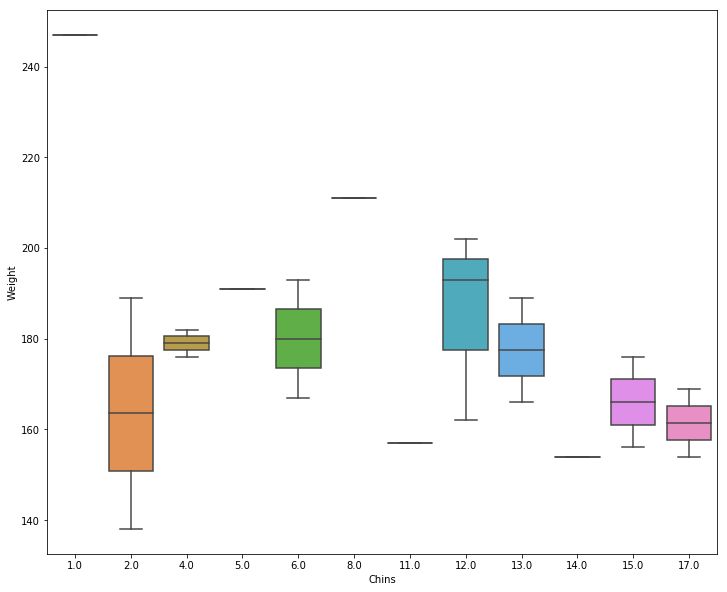

In [24]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Chins', y='Weight',data=df)